In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten 
from keras.layers import Dense
from keras.layers import Dropout, LocallyConnected2D, BatchNormalization, Activation, SeparableConv2D
from keras import layers
from keras.models import Model
import matplotlib.pyplot as plt

In [0]:
import pandas as pd

In [0]:
from google.colab  import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = '/content/gdrive/My Drive/THI'

In [0]:
emotion = pd.read_csv(path + '/emotion.csv')
emotion.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
emotion.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [0]:
emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [0]:
emotion.pixels[0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [0]:
len(emotion.pixels[0])

8287

In [0]:
emotion.groupby('Usage').count()

,emotion,pixels
Usage,,
PrivateTest,3589,3589
PublicTest,3589,3589
Training,28709,28709


In [0]:
import numpy as np
def reshape_string_listofnumber(df, index):
  string = df[index]
  string = string.split(' ')
  lst = np.array([int(charac) for charac in string])

  return lst

In [0]:
def reshape_dataset_matrix(df):
  matrix = np.empty((df.shape[0], 48, 48, 1))
  for i in range(df.shape[0]):
    ele = reshape_string_listofnumber(df, i)
    ele = np.reshape(ele,(48,48,1))
    matrix[i] = ele

  return matrix

In [0]:
X_train = emotion.pixels[emotion.Usage == 'Training']
X_test = emotion.pixels[emotion.Usage == 'PrivateTest'].reset_index(drop = True)

X_train = reshape_dataset_matrix(X_train)
X_test = reshape_dataset_matrix(X_test)

In [0]:
X_train[40]

array([[[ 74.],
        [ 66.],
        [ 82.],
        ...,
        [ 73.],
        [ 80.],
        [ 91.]],

       [[ 69.],
        [ 63.],
        [ 69.],
        ...,
        [ 74.],
        [ 75.],
        [ 83.]],

       [[ 52.],
        [ 62.],
        [ 64.],
        ...,
        [ 63.],
        [ 80.],
        [ 89.]],

       ...,

       [[ 93.],
        [ 94.],
        [ 94.],
        ...,
        [213.],
        [213.],
        [212.]],

       [[ 93.],
        [ 92.],
        [ 93.],
        ...,
        [213.],
        [213.],
        [213.]],

       [[ 91.],
        [ 92.],
        [ 93.],
        ...,
        [214.],
        [214.],
        [214.]]])

In [0]:
from keras.utils import to_categorical
Y_train = emotion.emotion[emotion.Usage == 'Training']
Y_test = emotion.emotion[emotion.Usage == 'PrivateTest'].reset_index(drop = True)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [0]:
def emotions(emo):
  if (emo) == 0:
    return 'giận dữ'
  elif (emo) == 1:
    return 'ghê tởm'
  elif (emo) == 2:
    return 'sợ hãi'
  elif (emo) == 3:
    return 'vui vẻ'
  elif (emo) == 4:
    return 'buồn'
  elif (emo) == 5:
    return 'bất ngờ'
  else:
    return 'trung lập'


# giận dữ: angry
# ghê tởm: disgust
# sợ hãi: fear
# vui vẻ: happy
# buồn: sad
# bất ngờ: surprised
# trung lập: neutral

Text(0.5, 1.0, 'Người trong hình có cảm xúc: giận dữ')

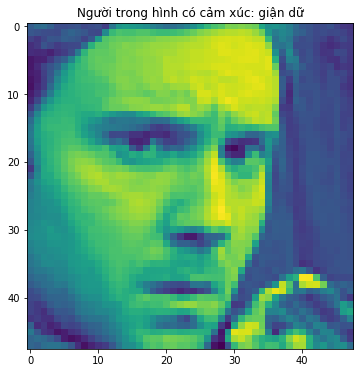

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
plt.imshow(np.reshape(X_train[0], (48,48)))
plt.title('Người trong hình có cảm xúc: {0}'.format(emotions(int(emotion.emotion[emotion.Usage == 'Training'][0]))))

Text(0.5, 1.0, 'Người trong hình có cảm xúc: trung lập')

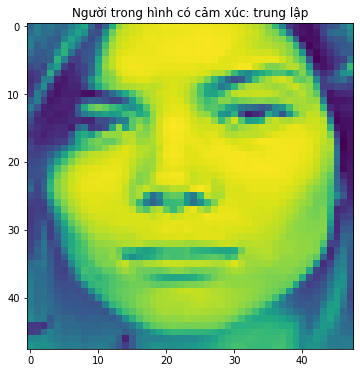

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
plt.imshow(np.reshape(X_train[35], (48,48)))
plt.title('Người trong hình có cảm xúc: {0}'.format(emotions(int(emotion.emotion[emotion.Usage == 'Training'][35]))))

Text(0.5, 1.0, 'Người trong hình có cảm xúc: vui vẻ')

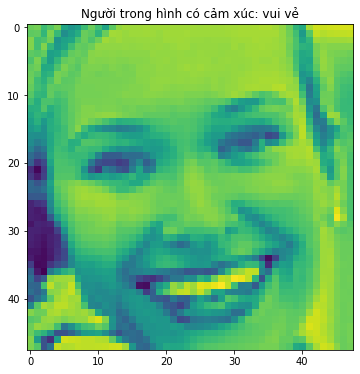

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
plt.imshow(np.reshape(X_train[80], (48,48)))
plt.title('Người trong hình có cảm xúc: {0}'.format(emotions(int(emotion.emotion[emotion.Usage == 'Training'][80]))))

In [0]:
model = Sequential()

outputFilters = 32
kernelSize = 3

model.add(Conv2D(outputFilters, kernelSize, padding='same', activation='relu',
                 input_shape=X_train[0].shape))
model.add(Conv2D(outputFilters, kernelSize, padding='same', activation='relu'))
model.add(Conv2D(outputFilters, kernelSize, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

#part2 ------------------------------------------------------------------------------------------------------
outputFilters2 = 64
kernelSize2 = 3 

model.add(Conv2D(outputFilters2, kernelSize2, padding='same', activation='relu'))
model.add(Conv2D(outputFilters2, kernelSize2, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(outputFilters2, kernelSize2, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

#part3 ------------------------------------------------------------------------------------------------------
outputFilters3 = 128
kernelSize3 = 3

model.add(LocallyConnected2D(outputFilters3, kernelSize3, padding='valid', activation='relu'))
#model.add(LocallyConnected2D(outputFilters3, kernelSize3, padding='valid', activation='relu'))
# Locally Connected is used for eliminating overfitting

#part4 ------------------------------------------------------------------------------------------------------
layerSize = 128

model.add(Flatten())
model.add(Dense(layerSize, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(layerSize, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [0]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)]

In [0]:
model.fit(X_train, Y_train, batch_size=256, epochs=80, validation_split=0.2,callbacks=callbacks, shuffle=True)

Train on 22967 samples, validate on 5742 samples
Epoch 1/80
22967/22967 [==============================] - 31s 1ms/step - loss: 1.9005 - acc: 0.2392 - val_loss: 1.8450 - val_acc: 0.2517
Epoch 2/80
22967/22967 [==============================] - 18s 781us/step - loss: 1.7132 - acc: 0.3114 - val_loss: 1.6155 - val_acc: 0.4006
Epoch 3/80
22967/22967 [==============================] - 18s 779us/step - loss: 1.5685 - acc: 0.3898 - val_loss: 1.5218 - val_acc: 0.4458
Epoch 4/80
22967/22967 [==============================] - 18s 780us/step - loss: 1.4630 - acc: 0.4323 - val_loss: 1.4323 - val_acc: 0.4460
Epoch 5/80
22967/22967 [==============================] - 18s 779us/step - loss: 1.3798 - acc: 0.4663 - val_loss: 1.3251 - val_acc: 0.5080
Epoch 6/80
22967/22967 [==============================] - 18s 780us/step - loss: 1.2992 - acc: 0.4993 - val_loss: 1.2830 - val_acc: 0.5266
Epoch 7/80
22967/22967 [==============================] - 18s 780us/step - loss: 1.2229 - acc: 0.5327 - val_loss: 1.254

In [0]:
model.fit(X_train, Y_train, batch_size=256, epochs=80, validation_split=0.3,callbacks=callbacks, shuffle=True)

Train on 20096 samples, validate on 8613 samples
Epoch 1/80
20096/20096 [==============================] - 16s 820us/step - loss: 0.2239 - acc: 0.9226 - val_loss: 1.2136 - val_acc: 0.7037
Epoch 2/80
20096/20096 [==============================] - 16s 817us/step - loss: 0.1898 - acc: 0.9325 - val_loss: 1.3198 - val_acc: 0.6919
Epoch 3/80
20096/20096 [==============================] - 16s 818us/step - loss: 0.1762 - acc: 0.9401 - val_loss: 1.3271 - val_acc: 0.6915
Epoch 4/80
20096/20096 [==============================] - 16s 816us/step - loss: 0.1678 - acc: 0.9418 - val_loss: 1.2590 - val_acc: 0.6915
Epoch 5/80
20096/20096 [==============================] - 16s 817us/step - loss: 0.1466 - acc: 0.9503 - val_loss: 1.3338 - val_acc: 0.6898
Epoch 6/80
20096/20096 [==============================] - 16s 815us/step - loss: 0.1510 - acc: 0.9500 - val_loss: 1.2940 - val_acc: 0.6870
Epoch 7/80
20096/20096 [==============================] - 16s 817us/step - loss: 0.1295 - acc: 0.9558 - val_loss: 1.4

In [0]:
p = model.predict(np.reshape(X_test[0], (1,48,48,1)))
p

array([[0.0385989 , 0.00460456, 0.76789963, 0.00667561, 0.0091432 ,
        0.16986135, 0.00321668]], dtype=float32)

In [0]:
np.argmax(p)

2

In [0]:
def make_predict_and_plot(img):
  arr = model.predict(np.reshape(img, (1,48,48,1)))
  emo_num = np.argmax(arr)

  plt.figure(figsize = (6,6))
  plt.imshow(np.reshape(img, (48,48)))
  plt.title('Dự đoán cảm xúc người trong hình: {0}'.format(emotions(emo_num)))
  plt.show()

  print('Reliable score: ', arr[0][emo_num])

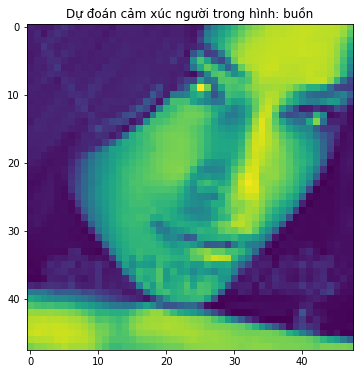

Reliable score:  0.9991048


In [0]:
make_predict_and_plot(X_test[21])

In [0]:
score = model.evaluate(X_test, Y_test)
score[1]

3589/3589 [==============================] - 2s 431us/step


0.5547506269487905

==> Mô hình trên có độ chính xác không cao, nên không chọn

In [0]:
from keras.regularizers import l2  
from keras.layers import Input
regularization = l2(0.01)

    # base
img_input = Input((48,48,1))
x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                                            use_bias=False)(img_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                                            use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

    # module 1
residual = Conv2D(16, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

    # module 2
residual = Conv2D(32, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

    # module 3
residual = Conv2D(64, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

    # module 4
residual = Conv2D(128, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

x = Conv2D(7, (3, 3),
            #kernel_regularizer=regularization,
            padding='same')(x)
x = GlobalAveragePooling2D()(x)
output = Activation('softmax',name='predictions')(x)

model = Model(img_input, output)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv2d_131 (Conv2D)             (None, 46, 46, 8)    72          input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_38 (BatchNo (None, 46, 46, 8)    32          conv2d_131[0][0]                 
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 46, 46, 8)    0           batch_normalization_38[0][0]     
____________________________________________________________________________________________

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5)]

In [0]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)
model.fit_generator(data_generator.flow(X_train, Y_train, 32),
                    steps_per_epoch=897,
                    epochs=20, verbose=1, callbacks=callbacks,
                    validation_data=(X_test,Y_test))

Epoch 1/20
897/897 [==============================] - 49s 55ms/step - loss: 1.4932 - acc: 0.4423 - val_loss: 1.5650 - val_acc: 0.4035
Epoch 2/20
897/897 [==============================] - 49s 55ms/step - loss: 1.3785 - acc: 0.4882 - val_loss: 1.4397 - val_acc: 0.4714
Epoch 3/20
897/897 [==============================] - 49s 54ms/step - loss: 1.3007 - acc: 0.5101 - val_loss: 1.3786 - val_acc: 0.5074
Epoch 4/20
897/897 [==============================] - 49s 54ms/step - loss: 1.2547 - acc: 0.5315 - val_loss: 1.2838 - val_acc: 0.5213
Epoch 5/20
897/897 [==============================] - 49s 54ms/step - loss: 1.2245 - acc: 0.5430 - val_loss: 1.2773 - val_acc: 0.5308
Epoch 6/20
897/897 [==============================] - 49s 54ms/step - loss: 1.2010 - acc: 0.5520 - val_loss: 1.3094 - val_acc: 0.5202
Epoch 7/20
897/897 [==============================] - 49s 54ms/step - loss: 1.1790 - acc: 0.5569 - val_loss: 1.1969 - val_acc: 0.5600
Epoch 8/20
897/897 [==============================] - 48s 54ms

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5), ModelCheckpoint(path + '/emotion_off.hdf5', 'val_loss', save_best_only = True)]

In [0]:
model.fit_generator(data_generator.flow(X_train, Y_train, 32),
                    steps_per_epoch=897,
                    epochs=80, verbose=1, callbacks=callbacks,
                    validation_data=(X_test,Y_test))

Epoch 1/80
897/897 [==============================] - 50s 55ms/step - loss: 1.0438 - acc: 0.6101 - val_loss: 1.0954 - val_acc: 0.5940
Epoch 2/80
897/897 [==============================] - 49s 54ms/step - loss: 1.0366 - acc: 0.6097 - val_loss: 1.2172 - val_acc: 0.5639
Epoch 3/80
897/897 [==============================] - 49s 55ms/step - loss: 1.0255 - acc: 0.6150 - val_loss: 1.2049 - val_acc: 0.5481
Epoch 4/80
897/897 [==============================] - 50s 55ms/step - loss: 1.0287 - acc: 0.6165 - val_loss: 1.1028 - val_acc: 0.5893
Epoch 5/80
897/897 [==============================] - 50s 55ms/step - loss: 1.0239 - acc: 0.6184 - val_loss: 1.0581 - val_acc: 0.6105
Epoch 6/80
897/897 [==============================] - 49s 55ms/step - loss: 1.0096 - acc: 0.6238 - val_loss: 1.1094 - val_acc: 0.5854
Epoch 7/80
897/897 [==============================] - 49s 55ms/step - loss: 1.0120 - acc: 0.6218 - val_loss: 1.1018 - val_acc: 0.5946
Epoch 8/80
897/897 [==============================] - 50s 56ms

In [0]:
from keras.models import load_model
classifier = load_model(path + '/emotion_off.hdf5')















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
score = classifier.evaluate(X_test, Y_test)
score[1]

3589/3589 [==============================] - 6s 2ms/step


0.612705489027364

==> Mô hình này có độ chính xác cao hơn nên em chọn mô hình này


In [0]:
def make_predict_and_plot(img):
  arr = classifier.predict(np.reshape(img, (1,48,48,1)))
  emo_num = np.argmax(arr)

  plt.figure(figsize = (6,6))
  plt.imshow(np.reshape(img, (48,48)))
  plt.title('Dự đoán cảm xúc người trong hình: {0}'.format(emotions(emo_num)))
  plt.show()

  print('Rate of this emotion: ', arr[0][emo_num], ' of the total 7 rates (if this rate is approximately over 40%, the result will be confidently correct)')

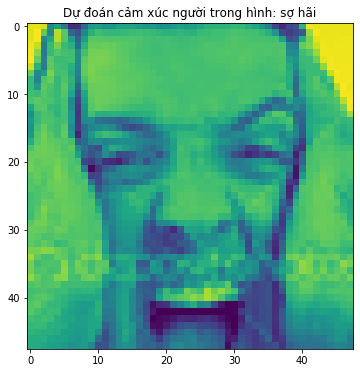

Rate of this emotion:  0.59190756  of the total 7 rates (if this rate is approximately over 40%, the result will be confidently correct)


In [0]:
make_predict_and_plot(X_test[8])

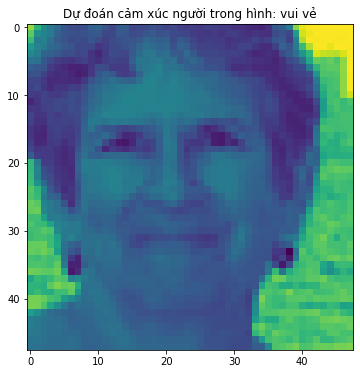

Rate of this emotion:  0.8661915  of the total 7 rates (if this rate is approximately over 40%, the result will be confidently correct)


In [0]:
make_predict_and_plot(X_test[20])

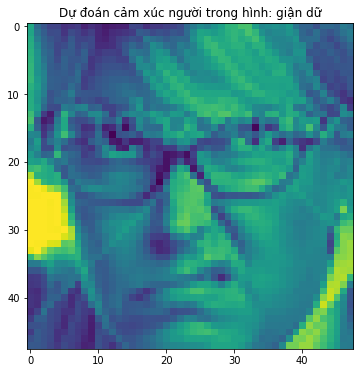

Rate of this emotion:  0.48147905  of the total 7 rates (if this rate is approximately over 40%, the result will be confidently correct)


In [0]:
make_predict_and_plot(X_test[0])

In [0]:
from keras.preprocessing import image

test_image = image.load_img(path + '/folder_cau3_test/sad.jpg', target_size = (48,48), grayscale=True)

test_image = image.img_to_array(test_image)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [0]:
import numpy as np
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 48, 48, 1)

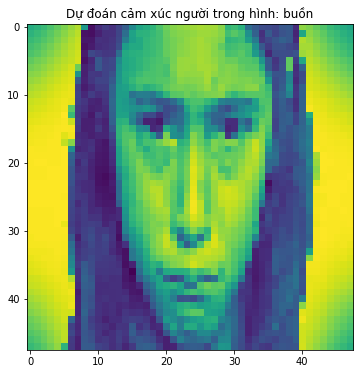

Rate of this emotion:  0.5318333  of the total 7 rates (if this rate is approximately over 40%, the result will be confidently correct)


In [0]:
make_predict_and_plot(test_image)